# **Introduction**
**In this notebook I'll Classify fetal health in order to prevent child and maternal mortality.**

**So, We will divide the result into 3 classes**
1. Normal
2. Suspect
3. Pathological

![](http://stream.org/wp-content/uploads/Scientist-Fetus-Embryo-healthy-Life-Baby-Science-Studies-900.jpg)

Firstly I'll explain what is the meaning of important feature:

* baseline value - Baseline Fetal Heart Rate (FHR)
* accelerations - Number of accelerations per second
* fetal_movement - Number of fetal movements per second
* uterine_con - Number of uterine contractions per second
* light_decelerations - Number of LDs per second
* severe_decel - Number of SDs per second
* prolongued_decel - Number of PDs per second
* abnormal_short - Percentage of time with abnormal short term variability
* mean_value_of_sh - Mean value of short term variability
* percentage_of_ti - Percentage of time with abnormal long term variability

**let's start import libraries.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error

**Read data**

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/mohammedalmishal/fetal_health/main/fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [5]:
print (f'data shape is {df.shape}')
print (f'data columns : \n {df.columns}')

data shape is (2126, 22)
data columns : 
 Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')


**describe data**

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


**missing data if there are some missing data that we have to fixed it**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

**It seems there are no missing data**

**My target is fetal_health which has the result.
So, we'll analysis it and find the relationship between it and other feature.**

Text(0.5, 1.0, 'Baseline Fetal Heart Rate (FHR) for each status')

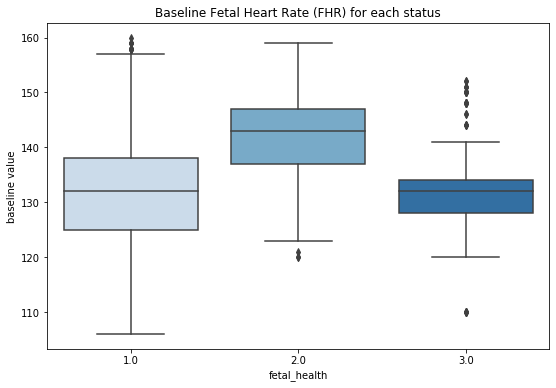

In [8]:
fetal = df['fetal_health']
plt.figure(figsize = (9,6))
sns.boxplot(x = fetal, y= 'baseline value', data = df, palette="Blues")
plt.title('Baseline Fetal Heart Rate (FHR) for each status')

remamber that 1.0 mean normal , 2.0 mean Suspect and 3.0 mean Pathological.

Text(0.5, 1.0, 'accelerations of each status health')

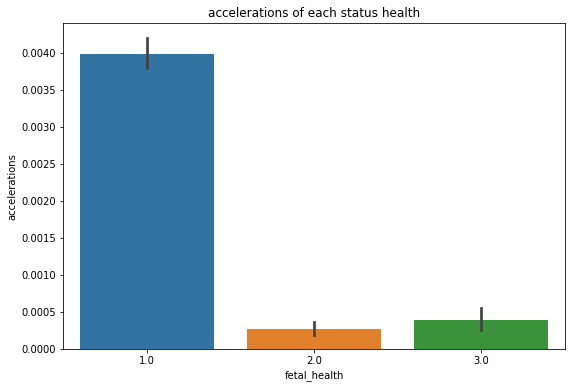

In [9]:
plt.figure(figsize = (9,6))
sns.barplot(x = fetal, y= 'accelerations', data = df )
plt.title("accelerations of each status health")

We will find the count of each status in this data, to easiest on us visualize it.

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64


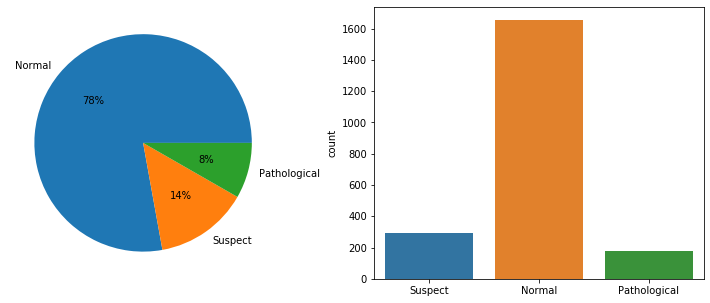

In [10]:
a, b, c = df['fetal_health'].value_counts()
plt.figure(figsize = (13,5))
plt.subplot(121)
plt.pie([a, b, c], labels=["Normal", "Suspect", "Pathological"], autopct="%1.0f%%")
print(df["fetal_health"].value_counts())
Status = {1: 'Normal', 2: 'Suspect', 3: 'Pathological'}
fetal = [Status[i] for i in df["fetal_health"]]
plt.subplot(122)
sns.countplot(fetal)

To more understand data we will find correlation between fetal health and other features.

fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
histogram_variance                                        0.206630
baseline value                                            0.148151
severe_decelerations                                      0.131934
fetal_movement                                            0.088010
histogram_min                                             0.063175
light_decelerations                                       0.058870
Name: fetal_health, dtype: float64


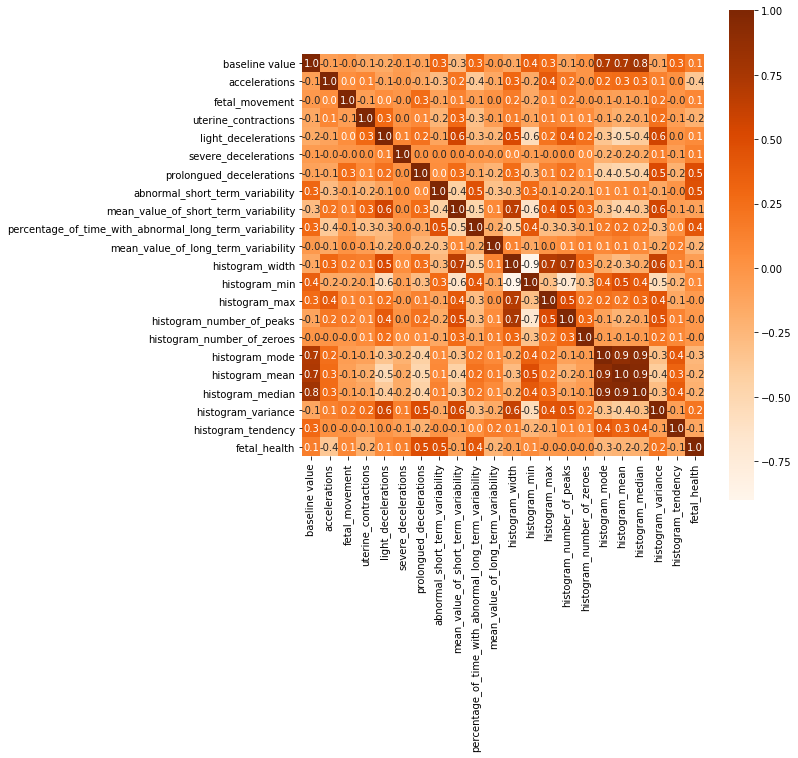

In [11]:
corr = df.corr()
sort_corr = corr.sort_values(by=["fetal_health"], ascending=False).head(10)
plt.figure(figsize = (9,9))
sns.heatmap(df.corr(), annot=True, cmap = "Oranges", fmt = '.1f', cbar = True, square = True)
print(sort_corr.fetal_health)

Let's see the distribution of the data and histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002106B235608>,
      dtype=object)

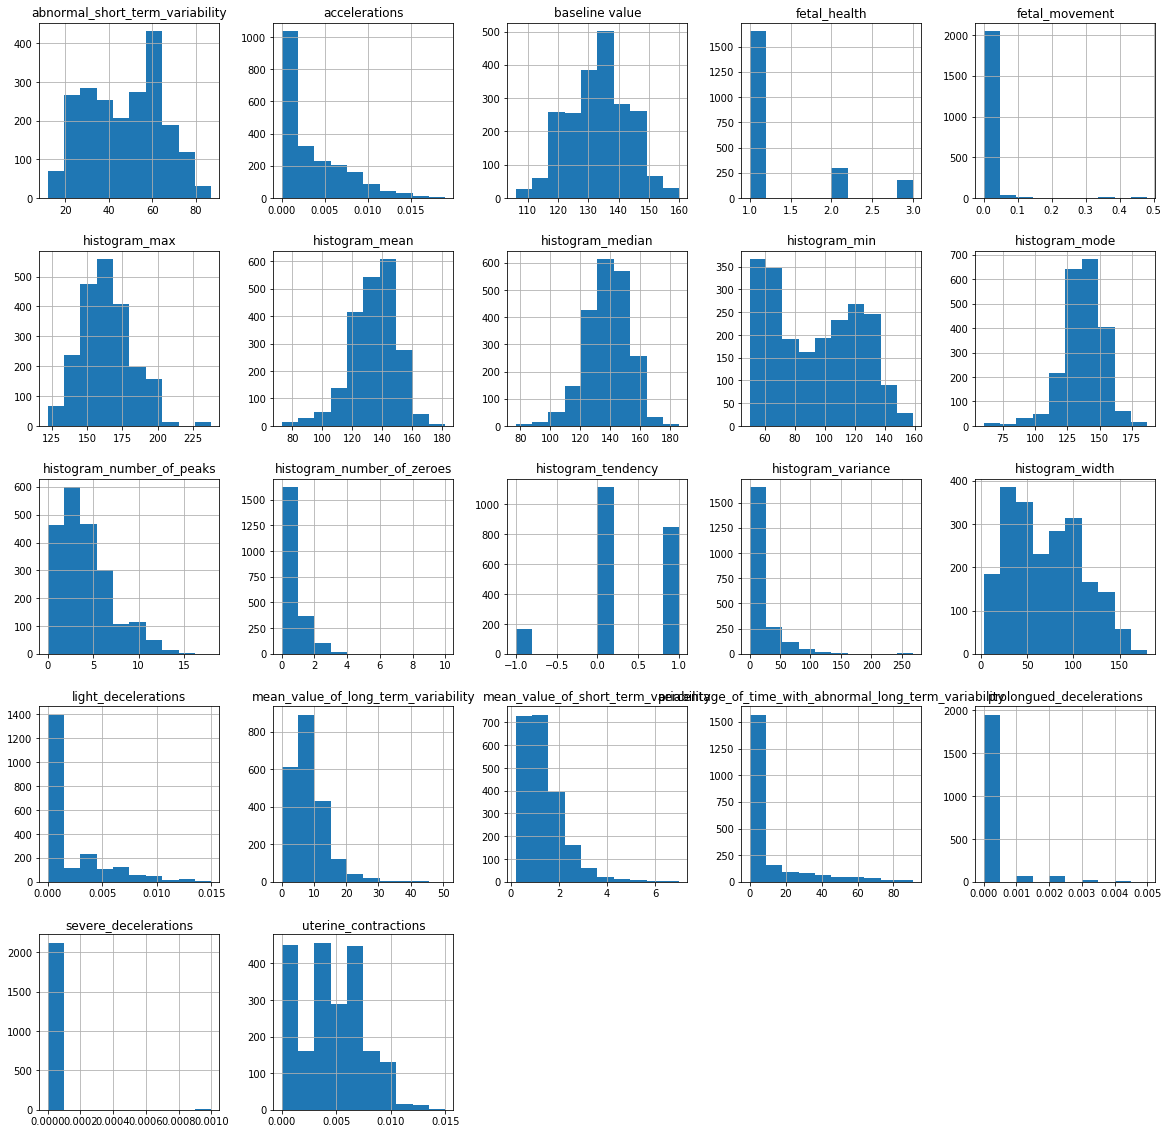

In [12]:
df.hist(figsize = (20,20))

The data is varied in numbers, and this creates some problems for us. We will normalize the data to avoid these problems.

In [13]:
col = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']
standardscaler = StandardScaler()
X = standardscaler.fit_transform(df.drop(["fetal_health"],axis = 1))
data_nor = pd.DataFrame(X, columns = col)
data_nor.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.352220,-0.822388,-0.20321,-1.482465,-0.638438,-0.057476,-0.268754,1.513190,-0.943095,1.802542,...,-0.165507,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,-1.181642,1.870569,1.112980
1,-0.132526,0.730133,-0.20321,0.554627,0.375243,-0.057476,-0.268754,-1.744751,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,0.132038,-0.234998,-0.524526
2,-0.030884,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.006244,-0.200481,-0.524526
3,0.070757,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.075385,-0.200481,1.112980
4,-0.132526,0.988886,-0.20321,1.233657,-0.638438,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.006244,-0.269516,1.112980


Let's split the data into training data and test data. Let's train the model on the training data and then test it on the test data.

In [14]:
target = df["fetal_health"]
X_train, X_test, y_train, y_test = train_test_split(data_nor, target, test_size = 0.3, random_state = 42, stratify = target)
logistic_regression = LogisticRegression()
logistic_regression_mod = logistic_regression.fit(X_train, y_train)
logistic_regression_mod.score(X_test, y_test)

0.8934169278996865

This ratio is in the Logistic Regression,
Let's try another model.

In [15]:
from sklearn import svm
clf = svm.SVC(C=2)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9106583072100314

In [16]:
pridict = clf.predict(X_test)
from sklearn.metrics import mean_squared_error
MSEValue = mean_squared_error(y_test, pridict)
print('Mean Squared Error Value is : ', MSEValue)

Mean Squared Error Value is :  0.10815047021943573


In [17]:
print("Classification Report")
print(classification_report(y_test, pridict))

Classification Report
              precision    recall  f1-score   support

         1.0       0.94      0.97      0.96       497
         2.0       0.72      0.66      0.69        88
         3.0       0.91      0.74      0.81        53

    accuracy                           0.91       638
   macro avg       0.85      0.79      0.82       638
weighted avg       0.91      0.91      0.91       638

